# Project 2: House Price Analysis

## Problem Statement

GA Properties (a subsidiary of GeneralAssembly) is planning to conduct a property investment seminar in Ames, Iowa. 
They have invited various stakeholders, from property developers to the community in Ames to attend this conference. This particular event will not only help the community to gain an edge whether they are a seller or a buyer, but also pull in interests from developers to build townships in Ames.

They have consulted with us to come up with a model that can best allow them to better understand the property market in Ames. 
1. What are the top 10 features most important to a house in Ames?
2. What are the worst 3 features that will devalue a house?

Using the Ames Housing Dataset, we will try to come up with a model after going through the 70+ features of the current housing market.

## Data Import and Cleaning

In [1]:
#Run imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Import data
df = pd.read_csv('../datasets/train.csv')

We will name our first call-in as 'df' for the time being, and later rename after cleaning/data imputing

In [3]:
#Get overview from head
pd.set_option('display.max_columns', 100)
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
#Change columns to small caps and remove space with underscores
df.columns = df.columns.str.replace(' ','_').str.lower()
#Check head
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
#Check dtype and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [6]:
#Check null values sum
df.isnull().sum().sort_values(ascending=False).head(30)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_cond        114
garage_qual        114
garage_yr_blt      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_cars          1
garage_area          1
bsmt_unf_sf          1
bsmtfin_sf_2         1
total_bsmt_sf        1
bsmtfin_sf_1         1
overall_cond         0
exterior_2nd         0
exterior_1st         0
roof_matl            0
dtype: int64

### Fill Null Values

Firstly, we will go through our data dictionary:
http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

Then decide if we want to fill the null entries with 
other inputs (mode, or specific input based on data dict)

Based on the features, we can do logical assumptions.

We noticed that there are a lot of categories that carries 'NA' in the data dictionary.

<span style='color:blue'>However, if we put 'NA' in our csv, it might not be helpful to other people when they import to other languages.</span>

Thus, we will treat 'None' as 'NA' in this project. The interpretation will be the same as our data dict:  
None = NA = Absence of feature

In [7]:
#Fill all null with 'None' as category first, then change for subsets if needed
#Fill NA with 'None'
df.fillna('None', inplace=True)

Check if features should put '0' or NA

In [8]:
#Sample Example:
df[df['garage_area']=='None'][['garage_area','garage_cars','garage_yr_blt','garage_type','garage_cond']]

,garage_area,garage_cars,garage_yr_blt,garage_type,garage_cond
1712,None,None,None,Detchd,None


We can see above that for this house, we can set as '0' and assume that it does not have a garage

In [9]:
#Sample Example:
df[df['bsmt_unf_sf']=='None'][['bsmt_unf_sf','bsmtfin_sf_1','bsmtfin_sf_2','bsmt_full_bath']]

,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_full_bath
1327,None,None,None,None


Also set all to '0', there is no basement for this house since all features of 'bsmt' is empty

In [10]:
#Sample Example:
df[df['bsmtfin_type_1']=='None'][['bsmt_qual','bsmt_unf_sf','bsmtfin_sf_1','bsmtfin_sf_2','bsmt_full_bath']].head()

,bsmt_qual,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_full_bath
12,None,0,0,0,0
93,None,0,0,0,0
114,None,0,0,0,0
146,None,0,0,0,0
183,None,0,0,0,0


In [11]:
#Sample Example:
df[df['mas_vnr_area']=='None'][['mas_vnr_area','mas_vnr_type']].head()

,mas_vnr_area,mas_vnr_type
22,None,None
41,None,None
86,None,None
212,None,None
276,None,None


For mas_vnr, we can see that the area and type were both empty, thus safely conclude that these houses do not have mas_vnr!  
After going through all features, then we can confidently change those features to '0'

In [12]:
#Fill those NaN values with 0 for 'continuous' features
#0 means absence of feature
lst = ['lot_frontage','mas_vnr_area',
   'bsmt_half_bath','bsmt_full_bath','garage_cars',
   'garage_area','bsmt_unf_sf','bsmtfin_sf_2','bsmtfin_sf_1','total_bsmt_sf']
for i in lst:
    df[i] = df[i].replace('None',0)

In [13]:
#If houses do not have garages, set Garage Year Built to same as Year Sold
#This is so that when we calculate as age, its garage age is '0'
for i in df.loc[df['garage_yr_blt'] == 'NA'].index:
    df['garage_yr_blt'][i] = float(df['yr_sold'][i])

In [14]:
#bsmt_exposure uses 'No' instead of 'None'
df['bsmt_exposure'] = df['bsmt_exposure'].replace('None','No')

## Outliers

As per recommended in our data dictionary, we want to remove some outliers

SPECIAL NOTES:
"There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students."

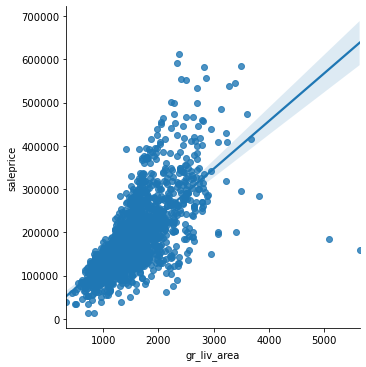

In [15]:
#Plot sale price vs gr liv area as suggested
sns.lmplot(x='gr_liv_area', y='saleprice', data=df)

<span style='color:blue'>We only observed 2 outliers although the data dict mentioned 5!   
    
It may be that the training set contains two of these five outliers. The test set contains three.  
However, we cannot touch the test set.<span>

In [16]:
#Check index num
df[df['gr_liv_area']>4000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,None,None,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,None,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,None,None,Elev,17000,10,2007,New,183850


In [17]:
#Drop outliers
df.drop([960, 1885], inplace=True)

During our data visualisation, we also encountered several features that had outliers!

Thus, we will remove the outliers from our dataset using interquartile (IQR) method.  
If value is n times IQR range, we will remove them using a function.

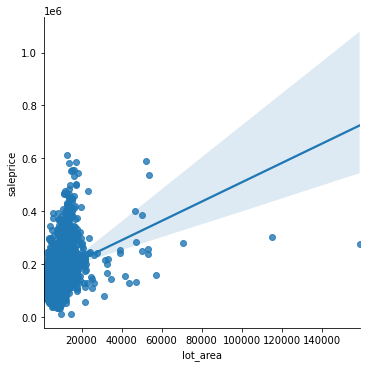

In [18]:
#Before remove outlier - sample: lot_area
sns.lmplot(x='lot_area', y='saleprice', data=df)

In [19]:
#Function to remove outliers
def remove_outlier(df,column,ntimes_iqr):
    #Set Q1
    Q1 = df[column].quantile(0.25)
    #Set Q3
    Q3 = df[column].quantile(0.75)
    #Set IQR
    IQR = Q3 - Q1
    #Using boolean rule, if value is outside n* IQR, we will remove it
    df_new = df[~((df[column] < (Q1 - ntimes_iqr * IQR)) |(df[column] > (Q3 + ntimes_iqr * IQR))).any(axis=1)]
    return df_new

By usual standards, outliers are defined as outside of 1.5 times the interquartile (IQR) range.  
However, we can view each feature case-by-case and apply 'n' with above function (be more generous with our data)

In [20]:
#Remove outliers in 'lot_area'
df = remove_outlier(df,['lot_area'],10)

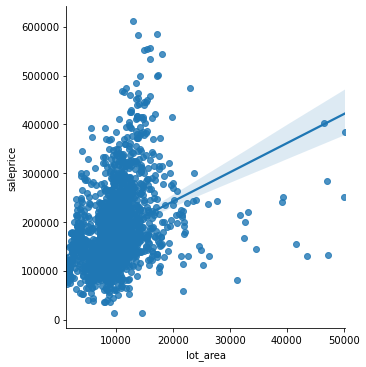

In [21]:
#After remove outlier - sample: lot_area
sns.lmplot(x='lot_area', y='saleprice', data=df)

## EDA

Firstly, let's check the relationship of each predictor features to our target 'sale price'

In [22]:
#Add independent variables of object type to a list
obj_lst = []
for i in df.columns:
    if df[i].dtype == 'object':
        obj_lst.append(i)

In [23]:
#Split function that divides our list into smaller lists
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i * k + min(i, m):(i + 1) * k + min(i + 1, m)] for i in range(n))

In [24]:
#List above is split into 7 parts, check each part
list(split(obj_lst,7))[0]

['ms_zoning',
 'street',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config']

Create subplots for each 'object' variable vs sale_price

In [25]:
#boxplot subplot function
def subplot_boxplot(dataframe, list_of_columns, y_feature):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.boxplot(ax=ax[i], x=column, y=y_feature, data=dataframe,
                showmeans=True, 
                meanprops={'markerfacecolor':'white','markeredgecolor':'black'}) # feel free to add more settings
        #show mean level and change color from default to white for better visibility

In [26]:
#set seaborn style for plots
sns.set()

Firstly, we will do a quick view of all categorical features against saleprice.  
After that, we will go further in depth to see if there are any collinearity using heatmaps or pairplots

For below boxplots, we also added showmean param for visualization (**triangle = mean**)

<u>[Extra Note]</u>

We could also change some features from categorical to ordinal, which will also greatly help visualization and especially during modelling. However for reasons below, we will not try this approach here.  
(Example: Change Ex/Gd/Fa/Po into 3/2/1/0)

1. The categories gets multiplied by their 'ranks/weight'  
   However, we cannot say for certain that Gd is 2 times better than Fa.

2. It is also very hard to ensure that the true relationship is the same in our final test set (Kaggle test.csv)

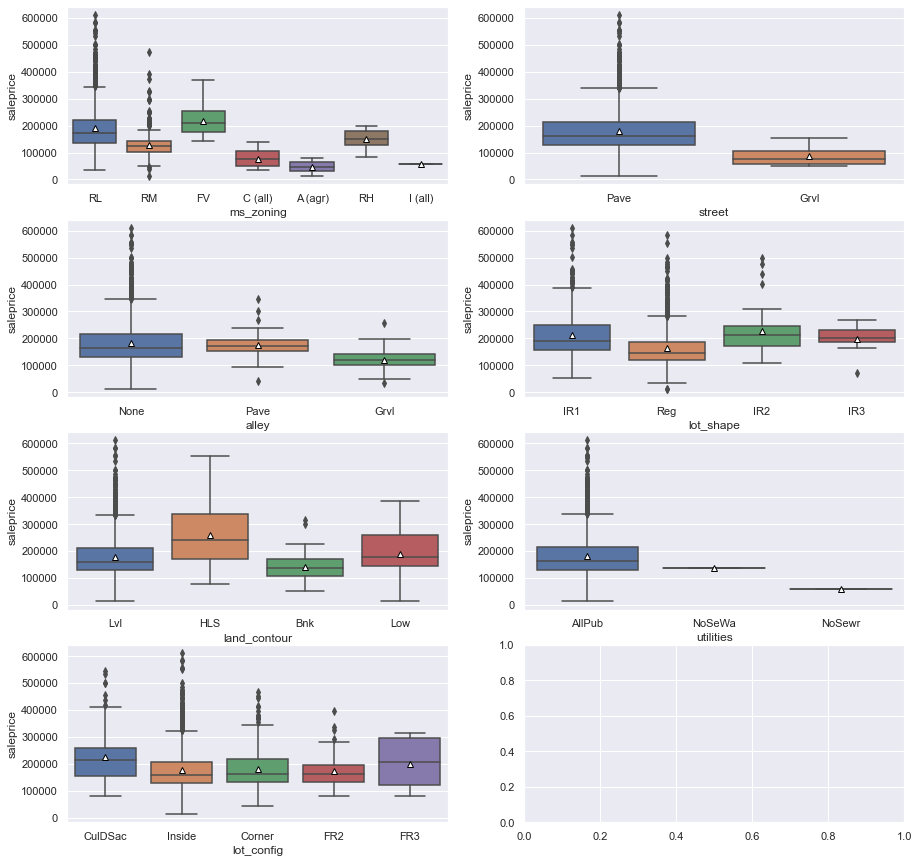

In [27]:
#Plot boxplot for discrete variables
subplot_boxplot(df, list(split(obj_lst,7))[0], 'saleprice')

- ms_zoning, alley, lot_shape, land_contour and lot_config does not seem helpful
  the IQR mostly overlap, and some of the means are very close
- utilities is impossible to use, we can see that sample count for NoSeWa and NoSewr is too little!
- ~90% of houses is 'level' in land_contour, thus is hard to use
- **Paved street and Gravel street shows clear difference with no overlap, we will want to consider to use this as our predictor feature**

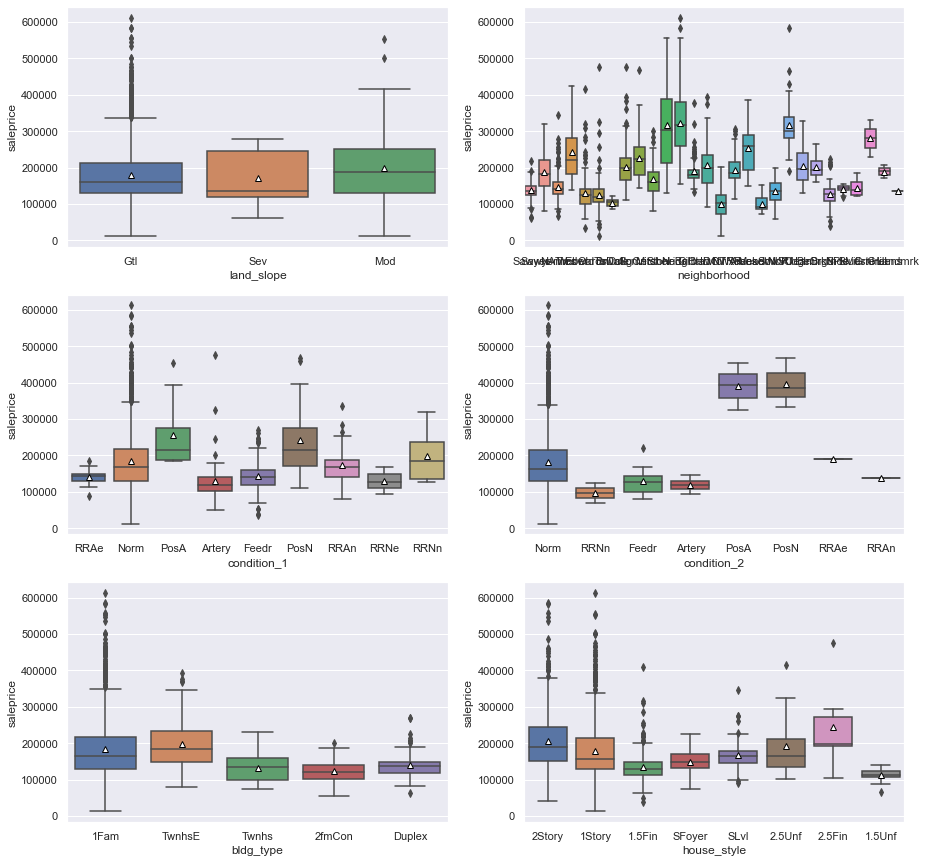

In [28]:
#Plot boxplot for discrete variables
subplot_boxplot(df, list(split(obj_lst,7))[1], 'saleprice')

From our list above, we observed that there are too many neighborhoods!
We can consider to further categorise into smaller clusters to get a better view.

- **In condition_2, PosA and PosN houses can sell for much higher compared to other conditions**
- there is also small but distinct price difference in house_style
  - however, ~75% of houses are 1Story and 2Story style, and the rest have a quite small sample size
- We are not interested in the rest (land_slope, condition_1, bldg_type)

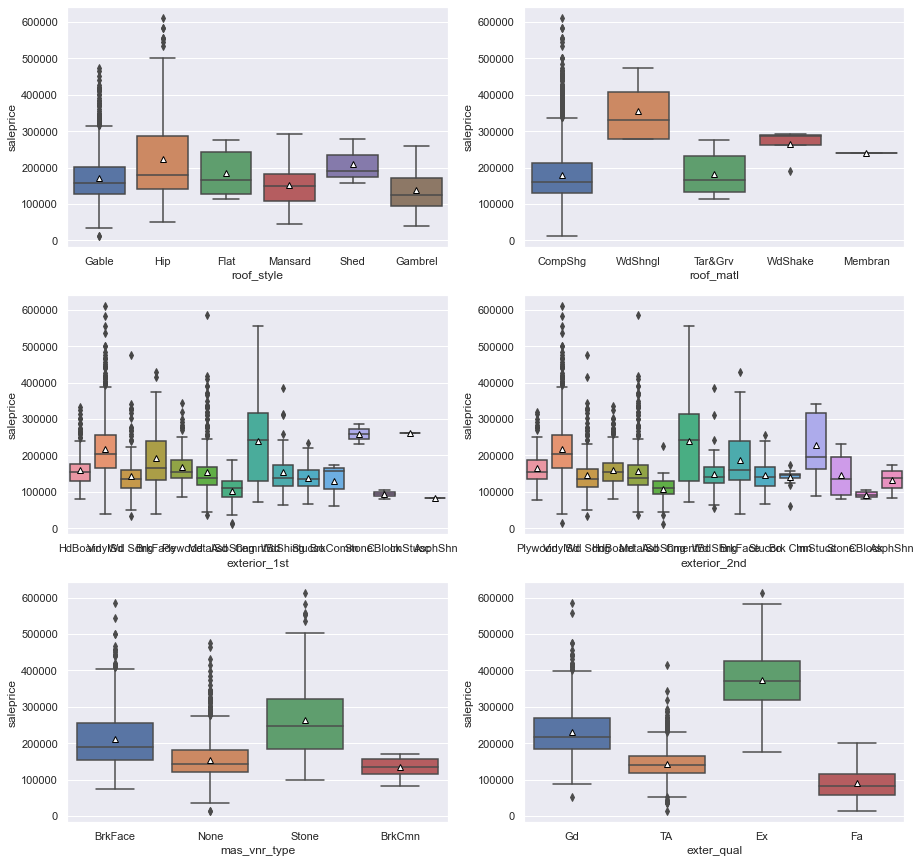

In [29]:
#Plot boxplot for discrete variables
subplot_boxplot(df, list(split(obj_lst,7))[2], 'saleprice')

- **we can identify that exter_qual is very useful, there is no overlap in the IQR and clear distinction between the mean of each category**
- roof_matl has >97% houses using CompShg, thus not helpful
- IQR is closely overlapped in exterior_1st, exterior_2nd, roof_style and mas_vnr_type

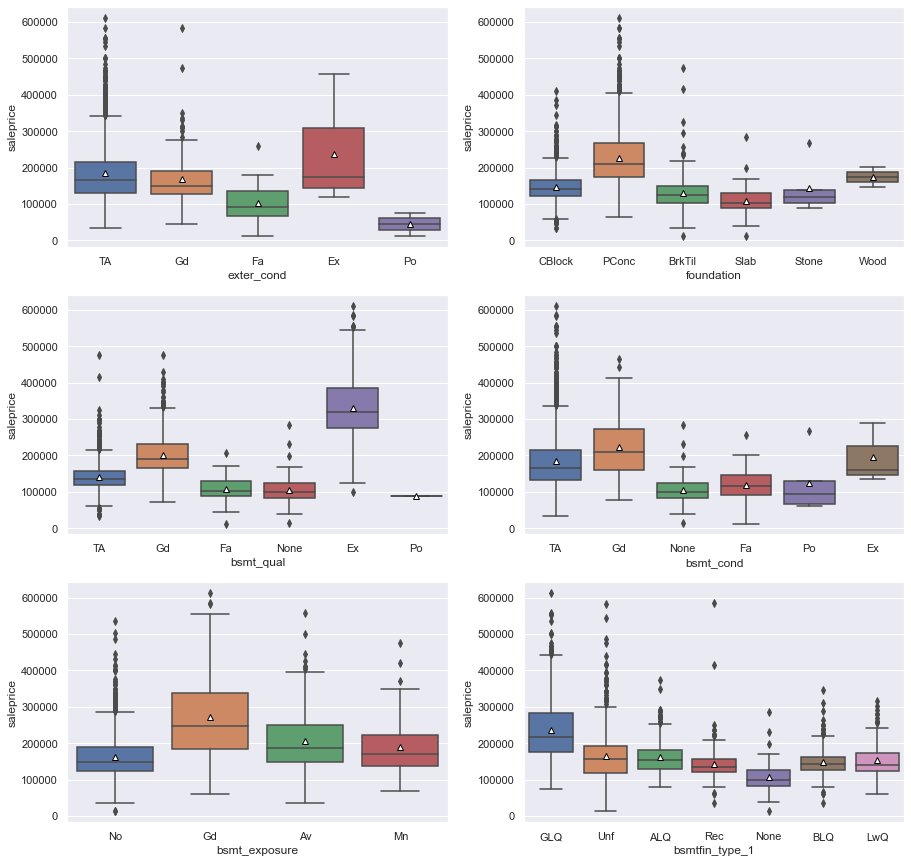

In [30]:
#Plot boxplot for discrete variables
subplot_boxplot(df, list(split(obj_lst,7))[3], 'saleprice')

- **exter_cond has no overlap in IQC, means are also clearly apart**
- **bsmt_exposure also show clear difference in mean between categories**
- very hard to interpret for bsmt_qual, 'None' and 'Fa' houses have almost same IQR and mean, but clear price jump if qual is 'Ex'
- we can see a lot of entries in bsmt_cond is at 'TA', after checking, >90% almost like a constant! thus, we do not want to consider bsmt_cond in our future models

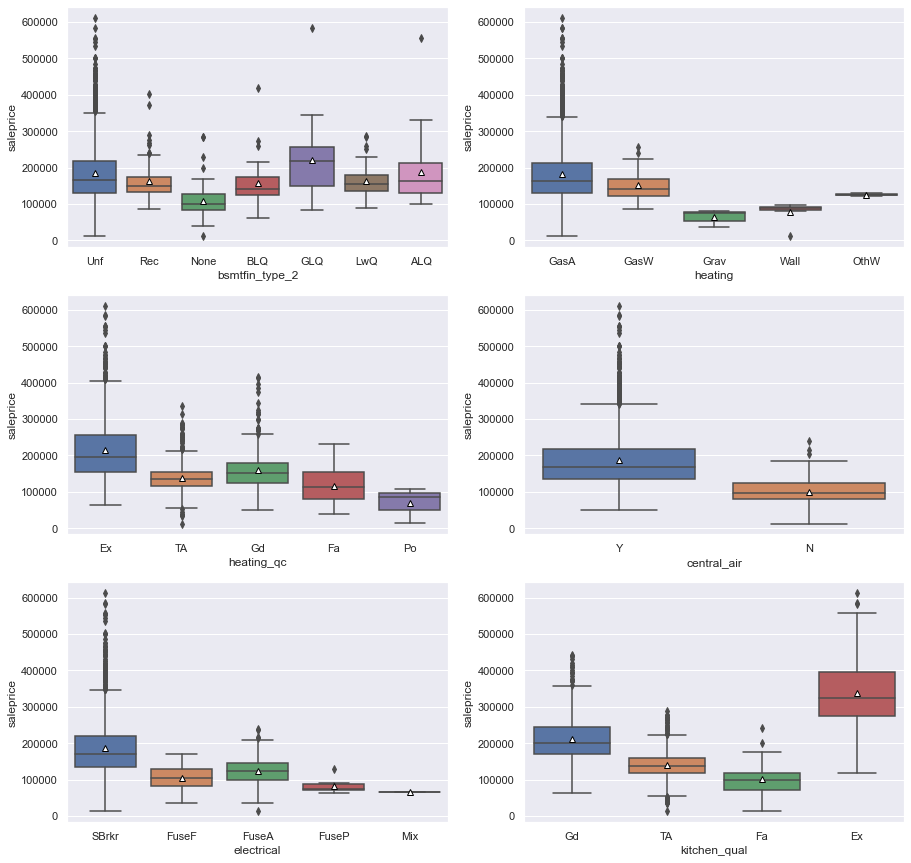

In [31]:
#Plot boxplot for discrete variables
subplot_boxplot(df, list(split(obj_lst,7))[4], 'saleprice')

- **central_air and kitchen_qual graphs look good! the IQR does not overlap**
- **heating_qc also show clear distinction in between categories**

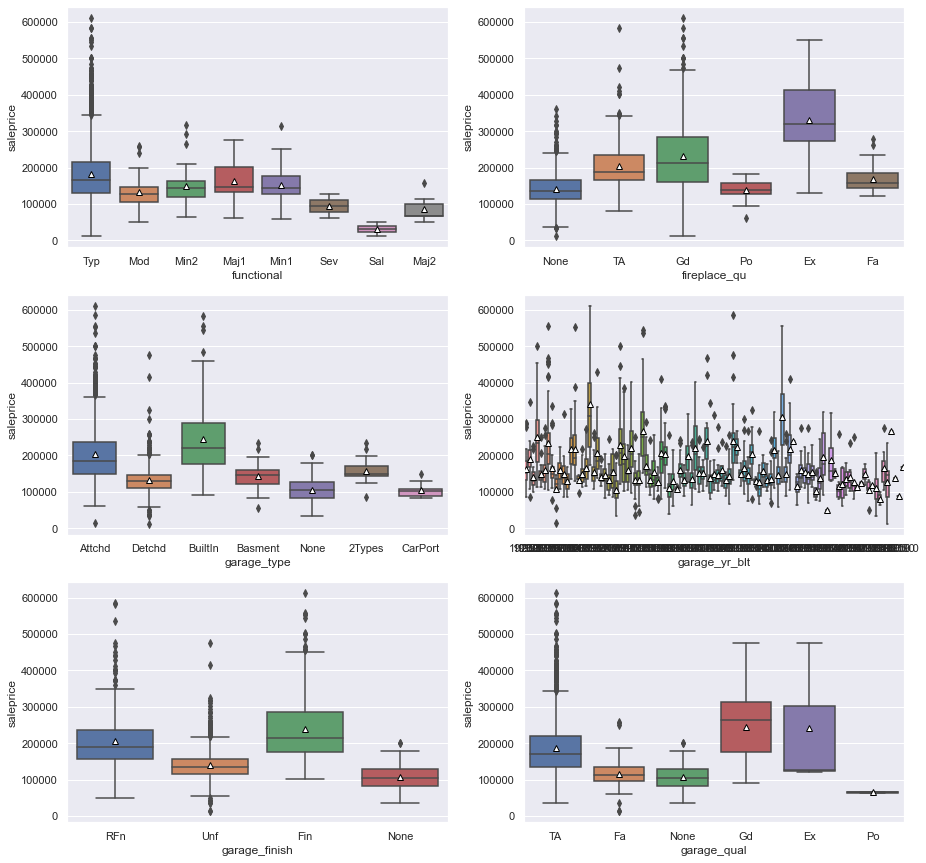

In [32]:
#Plot boxplot for discrete variables
subplot_boxplot(df, list(split(obj_lst,7))[5], 'saleprice')

- **we are interested in garage_finish and fireplace_qu - clearer visualisation compared to the rest**
- if we were to compare garage_finish and garage_qual, we can pick garage_finish
- ~90% of houses have garage_qual = 'TA'


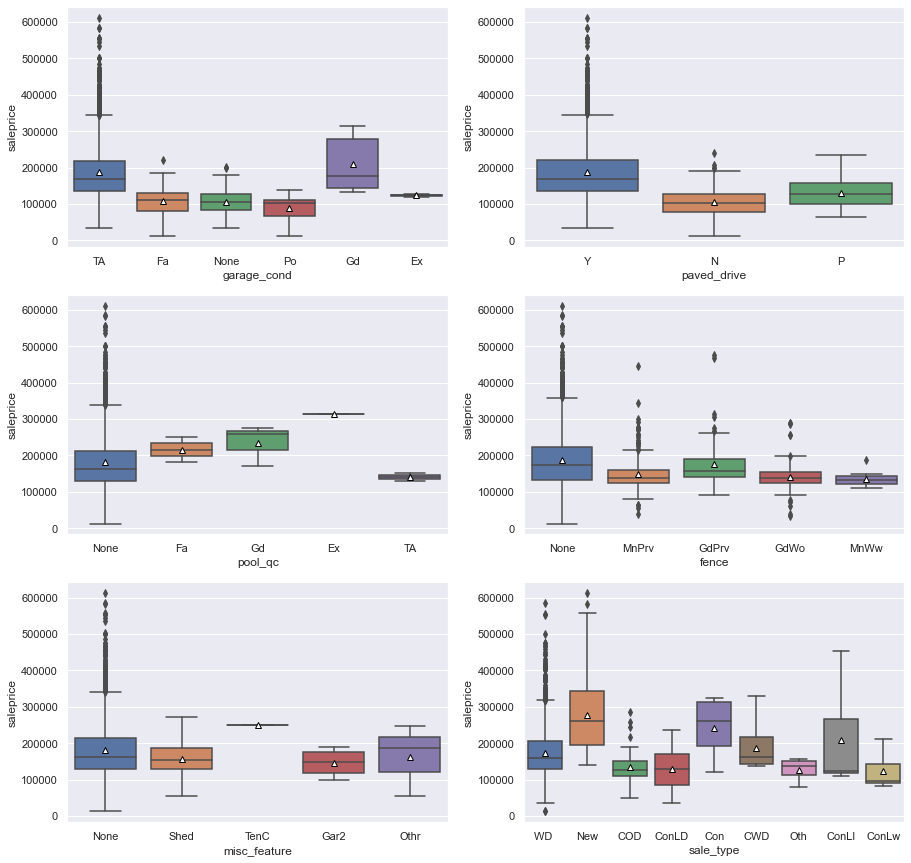

In [33]:
#Plot boxplot for discrete variables
subplot_boxplot(df, list(split(obj_lst,7))[6], 'saleprice')

- pool_qc shows clear difference, but for reasons discussed further down, we will not consider (>90% of houses have no pool)
- other features are not useful

<u>**Categorical Observations Summary**</u>  
Look for any features that can contribute to price difference  
Are the interquartile range overlapping or not? Does the mean vary a lot?

Features identified through above visualization:
1. street
2. neighborhood
3. condition_2
4. exter_qual
5. exter_cond
5. bsmt_exposure
6. central_air
7. kitchen_qual
8. garage_finish
9. heating_qc
10. fireplace_qu

A lot of categories have overlapping interquartile ranges, and the mean lies close to one another.  
Example: 'fence' - Houses with no fence and with good privacy fences have almost the same value.

There are also some which does not make particular sense.
Example: 'pool qc' - Houses with no pool are able to sell for almost the same price as one with typical/average pool. 

Thus, we do not consider these features that exhibit above two observations as important features

In [34]:
#check continuous variables with scatterplot
cont_lst = []
for i in df.columns:
    if df[i].dtype != 'object':
        cont_lst.append(i)

In [35]:
#list is split into 7 parts, check each part
list(split(cont_lst,7))[0]

['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual']

In [36]:
#scatter subplot function
def subplot_scatter(dataframe, list_of_columns, y_feature):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.scatterplot(ax=ax[i],x=column, y=y_feature, data=dataframe) # feel free to add more settings

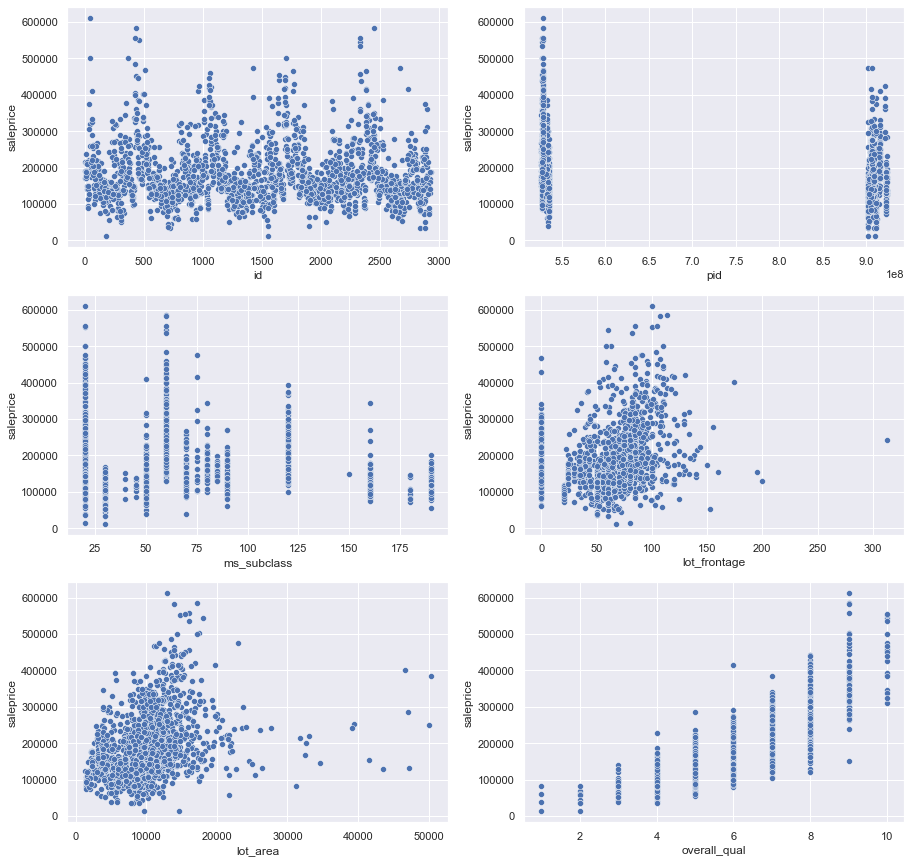

In [37]:
#plot boxplot for discrete variables
subplot_scatter(df, list(split(cont_lst,7))[0], 'saleprice')

- **lot_frontage, lot_area and overall_qual is linearly proportional to saleprice**
- id and pid are useless in prediction

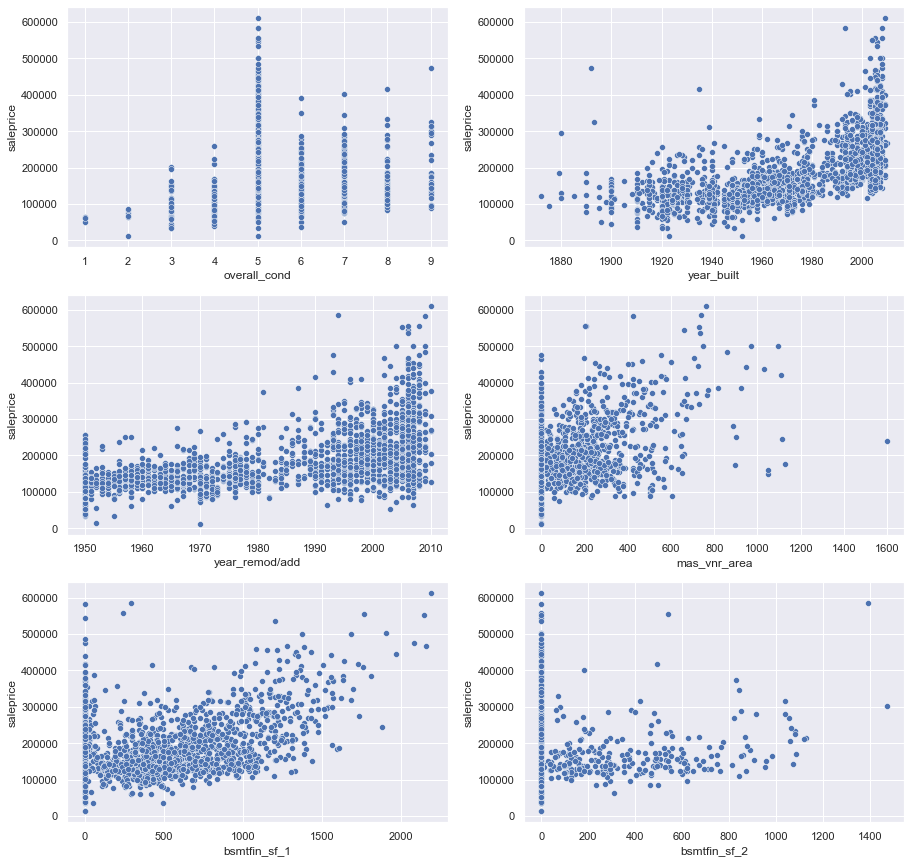

In [38]:
#plot boxplot for discrete variables
subplot_scatter(df, list(split(cont_lst,7))[1], 'saleprice')

All features above (except for bsmtfin_sf_2) are proportional to the saleprice.
- however, for year_built and year_remod/add are currently acting as a 'categorical' variable, we may want to change its functionality later

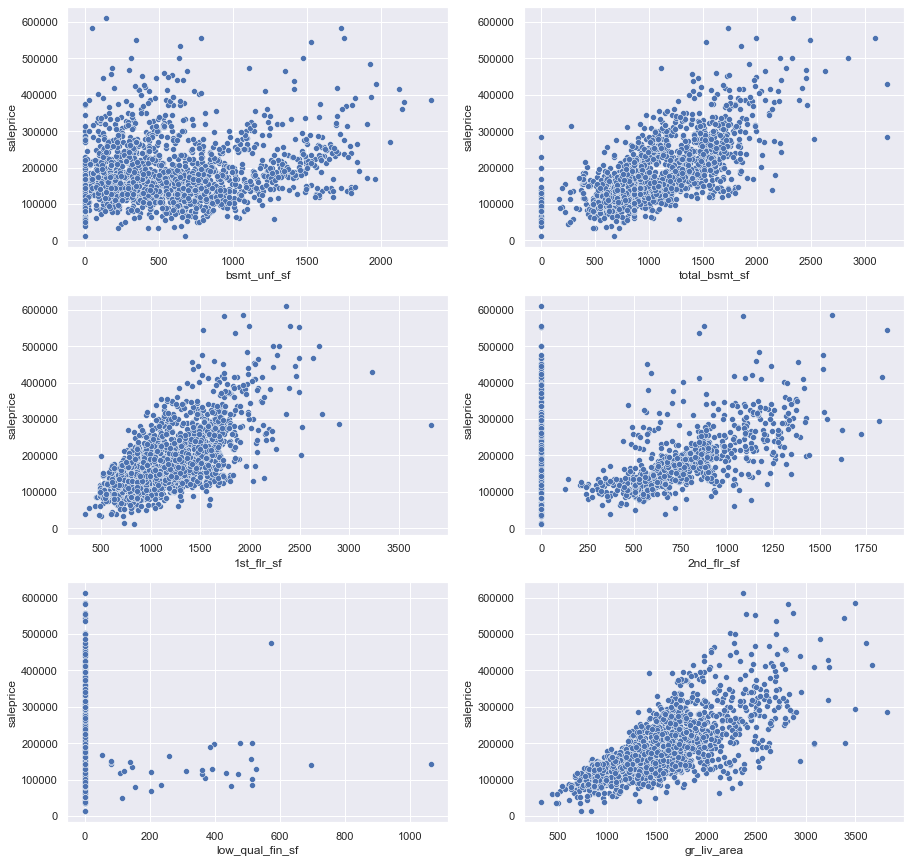

In [39]:
#plot boxplot for discrete variables
subplot_scatter(df, list(split(cont_lst,7))[2], 'saleprice')

All features above (except for low_qual_fin_sf) are proportional to the saleprice.

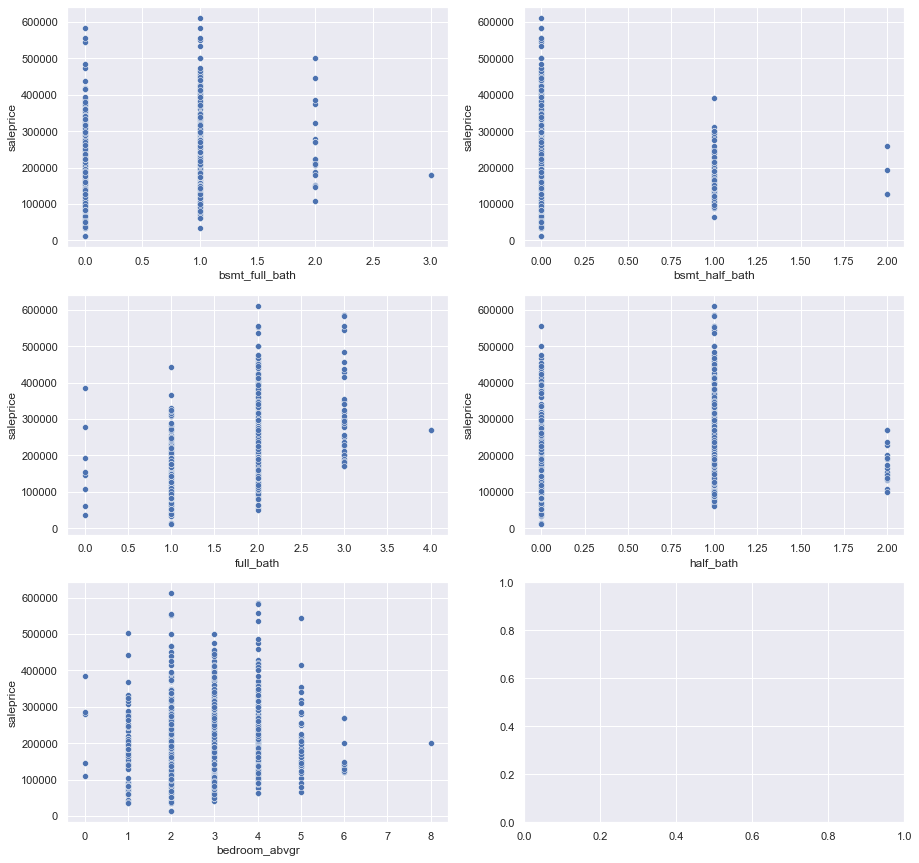

In [40]:
#plot boxplot for discrete variables
subplot_scatter(df, list(split(cont_lst,7))[3], 'saleprice')

All features above show some slight proportional relationship to the saleprice.

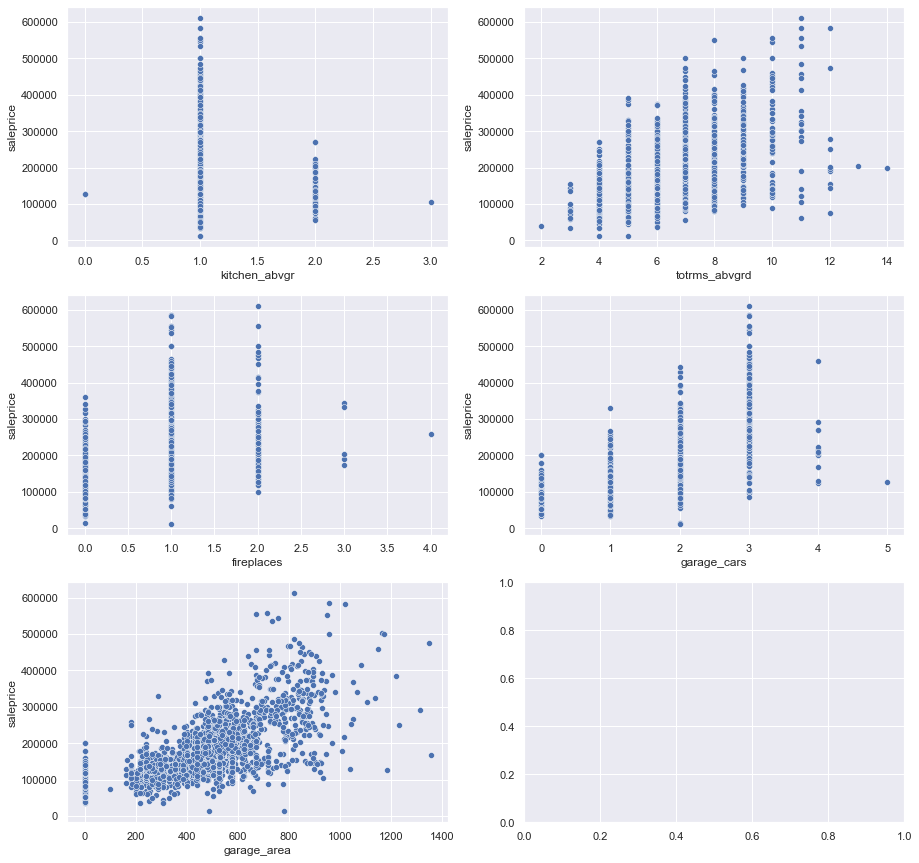

In [41]:
#plot boxplot for discrete variables
subplot_scatter(df, list(split(cont_lst,7))[4], 'saleprice')

All features above (except for kitchen_abvgr) are proportional to the saleprice.
- for kitchen_abvgr, >95% is at 1.0, thus render this feature unusable

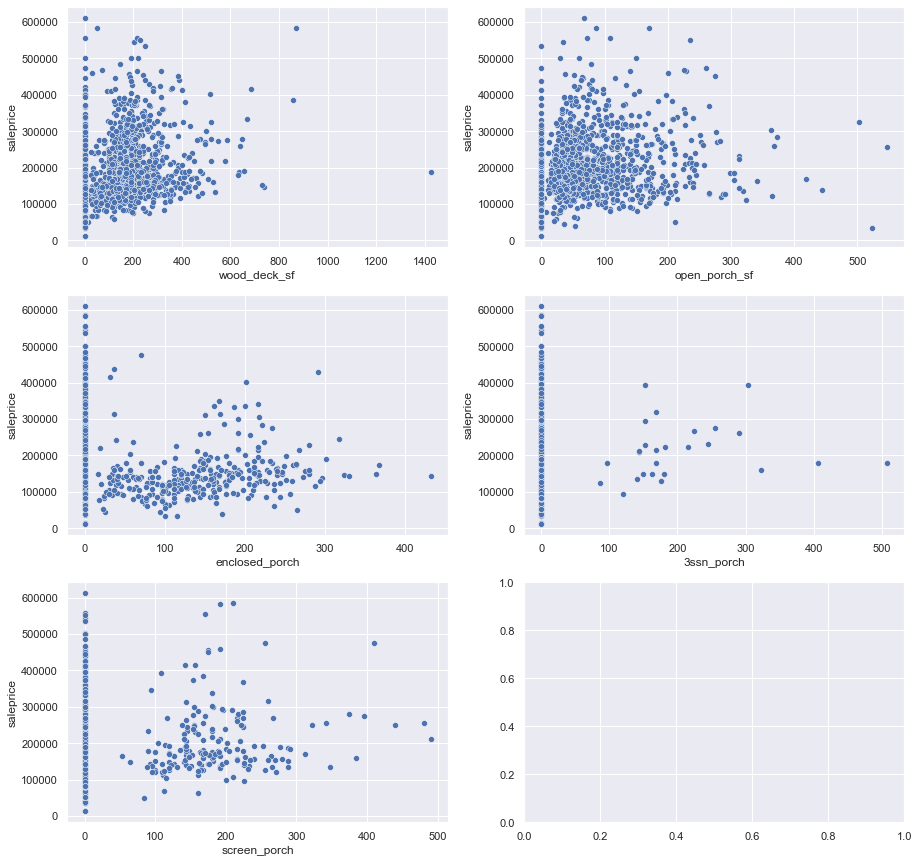

In [42]:
#plot boxplot for discrete variables
subplot_scatter(df, list(split(cont_lst,7))[5], 'saleprice')

- enclosed_porch seems to have no correlation to saleprice from our eyeball viewpoint
- 3ssn_porch has too few datapoints outside of '0'
- rest are acceptable

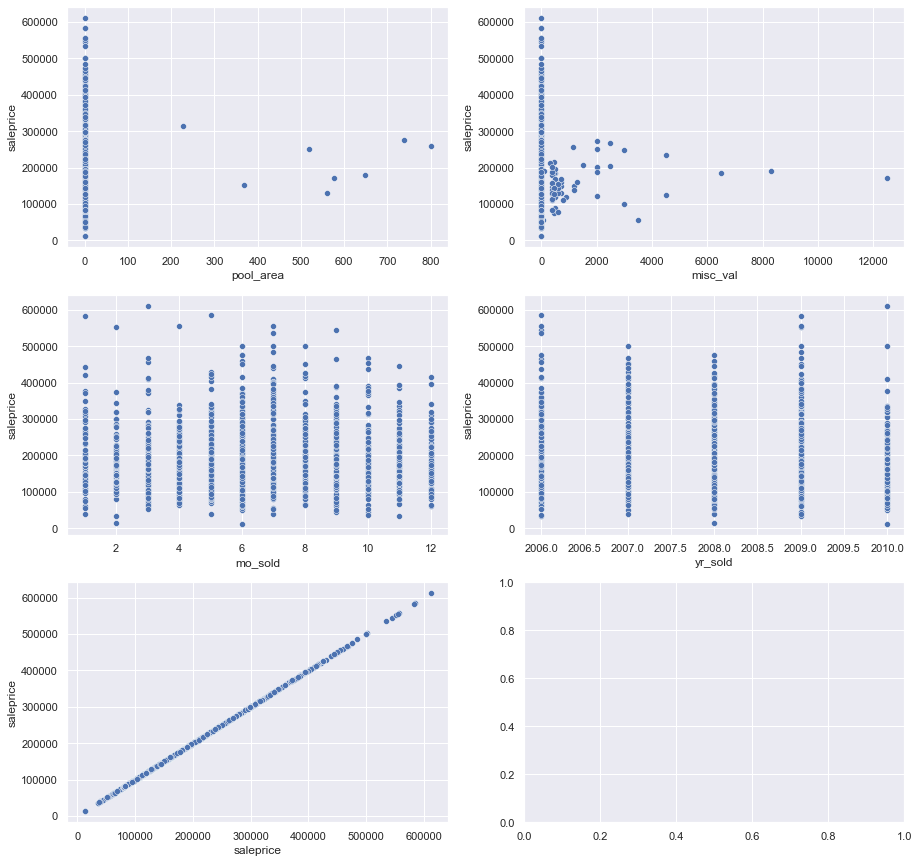

In [43]:
#plot boxplot for discrete variables
subplot_scatter(df, list(split(cont_lst,7))[6], 'saleprice')

- mo_sold and yr_sold are useless to our prediction
  - may use them in changing our features instead
- pool_area and miscl_val have too many values at '0'

<u>**Numerical Observations Summary**</u>

We want to look for any features that are highly correlated (+/-) to our saleprice

1. lot_frontage
1. lot_area
1. overall_qual
1. overall_cond
1. year_built
1. year_remod/add
1. mas_vnr_area
1. bsmt_sf_1
1. bsmt_unf_sf
1. total_bsmt_sf
1. 1st_flr_sf
1. 2nd_flr_sf
1. gr_liv_area
1. bsmt_full_bath
1. bsmt_half_bath
1. full_bath
1. half_bath
1. bedroom_abvgr
1. totrms_abvgrd
1. fireplace
1. garage_cars
1. garage_area
1. wood_deck_sf
1. open_porch_sf
1. screen_porch

**All the features observed have clear correlation to the sale price and can be considered to be used as our predictor features.**

Some continuous features such as 'yr_sold' may not seem useful, but we will dive further into how we can use such columns during feature editing.

**Some of the features here could better visualized with a boxplot instead**  
Example: overall qual, overall_cond, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath  
We can review them and see if any changes our decision.

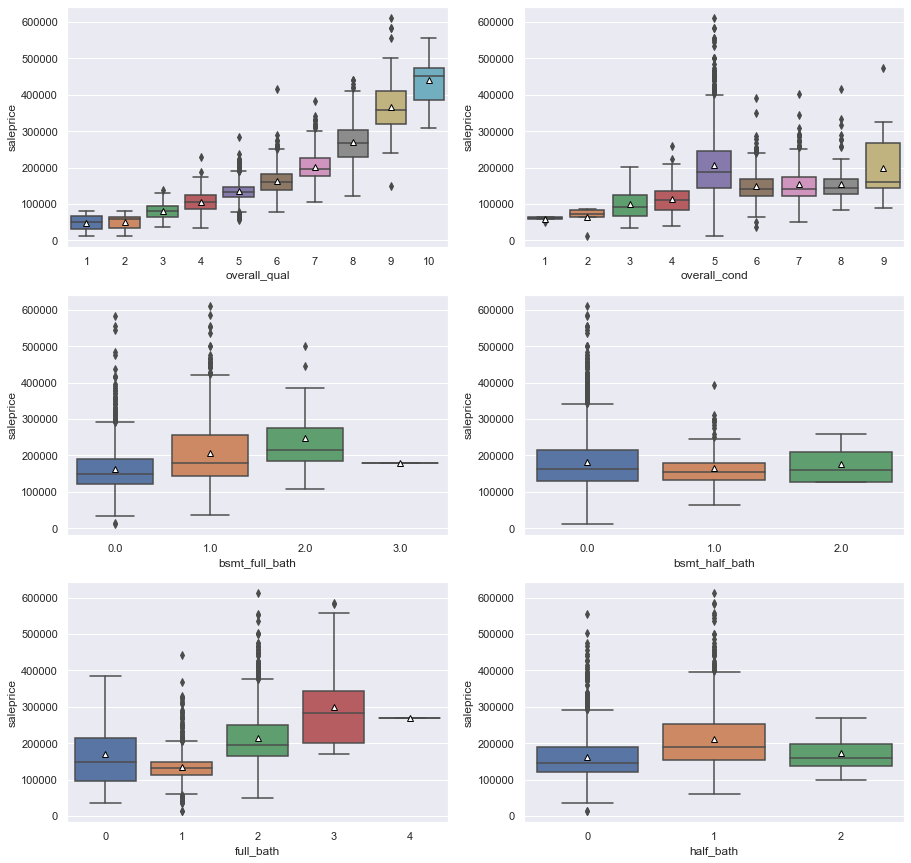

In [44]:
#Replot with boxplot when we treat them as categorical features
lst = ['overall_qual', 'overall_cond', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath']
subplot_boxplot(df, lst, 'saleprice')

The visualizations are much better, and reinforces our decision to select them.  
There is clear difference in the mean between each subcategory.

### Constants

We also noticed some features that were available almost **>90%** in our samples.  
Thus, <span style='color:blue'>we can treat such features as constants throughout the whole data, and is not meaningful to input into our linear model (leave them out)<span>.

In [45]:
#Check categories percentage
df['street'].value_counts()

Pave    2034
Grvl       7
Name: street, dtype: int64

In [46]:
#Check categories percentage
df['condition_2'].value_counts()

Norm      2015
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAe         1
RRAn         1
Name: condition_2, dtype: int64

In [47]:
#Check categories percentage
df['central_air'].value_counts()

Y    1900
N     141
Name: central_air, dtype: int64

In [48]:
#Check categories percentage
df['fireplace_qu'].value_counts()

None    1000
Gd       518
TA       403
Fa        58
Po        31
Ex        31
Name: fireplace_qu, dtype: int64

- 99.9% of houses have paved street
- 98.7% of houses have normal condition2
- 93.1% of houses have central airconditioning  

**Thus, let's remove out street / condition_2 / central_air from our consideration.**

### HeatMap / PairPlots

There are multiple features inside our dataset that are highly related to each other:  
1. Garage - garage_cars / garage_areas
2. Basement - bsmtfin_sf_1 / bsmt_unf_sf / total_bsmt_sf
3. Bathroom - bsmt_full_bath / bsmt_half_bath / full_bath / half_bath
4. Living area - 1st_flr_sf / 2nd_flr_sf / gr_liv_area
5. Porch - open_porch_sf / screen_porch

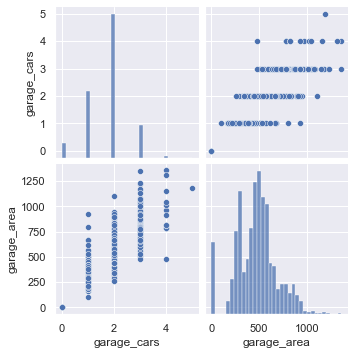

In [49]:
#Check Garage pairplot
sns.pairplot(df[['garage_cars','garage_area']]);

In [50]:
#Check corr score
df[['garage_cars','garage_area']].corr()

,garage_cars,garage_area
garage_cars,1.000000,0.897636
garage_area,0.897636,1.000000


**garage_cars and garage_area is highly correlated!**   
**Let's pick garage_area because area dictates the number of cars**

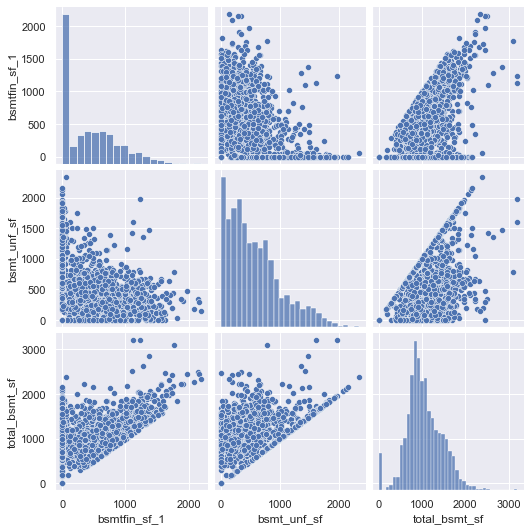

In [51]:
#Check Basement pairplot
sns.pairplot(df[['bsmtfin_sf_1','bsmt_unf_sf','total_bsmt_sf']]);

In [52]:
#Check corr score
df[['bsmtfin_sf_1','bsmt_unf_sf','total_bsmt_sf']].corr()

,bsmtfin_sf_1,bsmt_unf_sf,total_bsmt_sf
bsmtfin_sf_1,1.000000,-0.502516,0.487757
bsmt_unf_sf,-0.502516,1.000000,0.438192
total_bsmt_sf,0.487757,0.438192,1.000000


From the pairplot model, we can see that bsmt_unf_sf is negatively proportional to bsmt_sf_1  
total_bsmt_sf is proportional to bsmt_unf_sf and bsmtfin_sf_1  
However, the graphs have a line that is the 'limit'.  
This line appears because total_bsmt_sf cannot be lower for bsmtfin_sf_1 and bsmt_unf_sf!  

**If bsmtfin_sf_1 is already '1000', then total_bsmt_sf will definitely be higher than '1000'**

In [53]:
#Check Bathroom pairplot
df[['bsmt_full_bath','bsmt_half_bath','full_bath','half_bath']].corr()

,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath
bsmt_full_bath,1.000000,-0.147564,-0.014654,-0.029600
bsmt_half_bath,-0.147564,1.000000,-0.063077,-0.048491
full_bath,-0.014654,-0.063077,1.000000,0.151130
half_bath,-0.029600,-0.048491,0.151130,1.000000


**all the baths are not highly correlated**  
however, we can consider to add all of them togehter to show the actualy number of baths available in any house

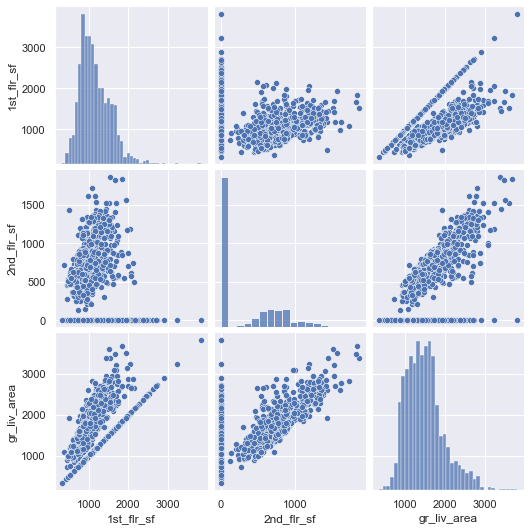

In [54]:
#Check Living Area pairplot
sns.pairplot(df[['1st_flr_sf','2nd_flr_sf','gr_liv_area']]);

In [55]:
#Check living area corr score
df[['1st_flr_sf','2nd_flr_sf','gr_liv_area']].corr()

,1st_flr_sf,2nd_flr_sf,gr_liv_area
1st_flr_sf,1.000000,-0.285572,0.528782
2nd_flr_sf,-0.285572,1.000000,0.656079
gr_liv_area,0.528782,0.656079,1.000000


the graphs for gr_liv_area and 1st_flr_sf have a 'baseline' as in basement.  
This line appears because gr_liv_are cannot be lower for 1st_flr_sf.  
If 1st_flr_sf is already '1000', then gr_liv_area will definitely be higher than '1000'

**However, the corr score is still moderate at this stage**  
**Thus, we do not remove either from our consideration yet**

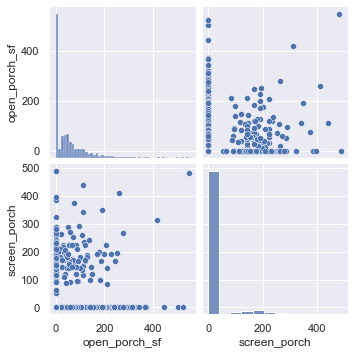

In [56]:
#Check Porch pairplots
sns.pairplot(df[['open_porch_sf','screen_porch']])

In [57]:
#Check Porch corr score
df[['open_porch_sf','screen_porch']].corr()

,open_porch_sf,screen_porch
open_porch_sf,1.000000,0.059493
screen_porch,0.059493,1.000000


No correlation, thus keep as feature

## Heatmap

After identifying some features via visualisation above, let's check our heatmap to see if we can observe more from our 20+ features!

In [58]:
#Create a separate dataframe for our features to be fed into part 2 of feature engineering!
train = pd.DataFrame()
features = ['saleprice',
            'lot_frontage',
            'lot_area',
            'overall_qual',
            'overall_cond',
            'year_built',
            'year_remod/add',
            'yr_sold',
            'mas_vnr_area',
            'bsmtfin_sf_1',
            'bsmt_unf_sf',
            'total_bsmt_sf',
            '1st_flr_sf',
            '2nd_flr_sf',
            'gr_liv_area',
            'bsmt_full_bath',
            'bsmt_half_bath',
            'full_bath',
            'half_bath',
            'bedroom_abvgr',
            'totrms_abvgrd',
            'fireplaces',       
            'garage_area',
            'wood_deck_sf',
            'open_porch_sf',
            'screen_porch',
            'neighborhood',
            'exter_qual',
            'exter_cond',
            'bsmt_exposure',
            'kitchen_qual',
            'garage_finish',
            'heating_qc',
            'fireplace_qu']
for i in features:
    train[i] = df[i]

In [59]:
#Check new dataframe
train

,saleprice,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,yr_sold,mas_vnr_area,bsmtfin_sf_1,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,totrms_abvgrd,fireplaces,garage_area,wood_deck_sf,open_porch_sf,screen_porch,neighborhood,exter_qual,exter_cond,bsmt_exposure,kitchen_qual,garage_finish,heating_qc,fireplace_qu
0,130500,0.0,13517,6,8,1976,2005,2010,289.0,533.0,192.0,725.0,725,754,1479,0.0,0.0,2,1,3,6,0,475.0,0,44,0,Sawyer,Gd,TA,No,Gd,RFn,Ex,None
1,220000,43.0,11492,7,5,1996,1997,2009,132.0,637.0,276.0,913.0,913,1209,2122,1.0,0.0,2,1,4,8,1,559.0,0,74,0,SawyerW,Gd,TA,No,Gd,RFn,Ex,TA
2,109000,68.0,7922,5,7,1953,2007,2010,0.0,731.0,326.0,1057.0,1057,0,1057,1.0,0.0,1,0,3,5,0,246.0,0,52,0,NAmes,TA,Gd,No,Gd,Unf,TA,None
3,174000,73.0,9802,5,5,2006,2007,2010,0.0,0.0,384.0,384.0,744,700,1444,0.0,0.0,2,1,3,7,0,400.0,100,0,0,Timber,TA,TA,No,TA,Fin,Gd,None
4,138500,82.0,14235,6,8,1900,1993,2010,0.0,0.0,676.0,676.0,831,614,1445,0.0,0.0,2,0,3,6,0,484.0,0,59,0,SawyerW,TA,TA,No,TA,Unf,TA,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,298751,79.0,11449,8,5,2007,2007,2008,0.0,1011.0,873.0,1884.0,1728,0,1728,1.0,0.0,2,0,3,7,1,520.0,0,276,0,Timber,Gd,TA,Av,Gd,Fin,Ex,Gd
2047,82500,0.0,12342,4,5,1940,1950,2009,0.0,262.0,599.0,861.0,861,0,861,0.0,0.0,1,0,1,4,0,539.0,158,0,0,Edwards,TA,TA,No,TA,Unf,Ex,None
2048,177000,57.0,7558,6,6,1928,1950,2009,0.0,0.0,896.0,896.0,1172,741,1913,0.0,0.0,1,1,3,9,1,342.0,0,0,0,Crawfor,TA,TA,No,TA,Unf,Gd,TA
2049,144000,80.0,10400,4,5,1956,1956,2009,0.0,155.0,295.0,1200.0,1200,0,1200,1.0,0.0,1,0,3,6,2,294.0,0,189,0,NAmes,TA,TA,No,TA,Unf,TA,Gd


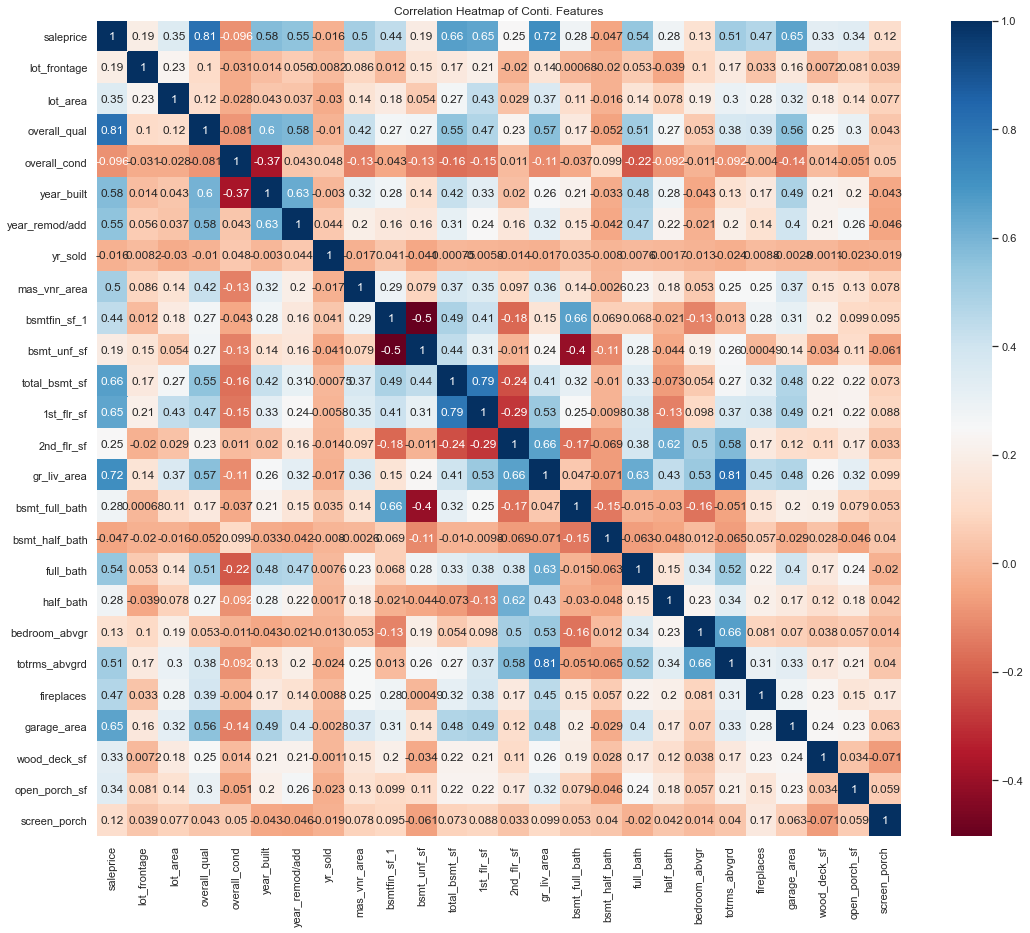

In [60]:
#Plot HeatMap
plt.figure(figsize =(18,15))
sns.heatmap(train.corr(), cmap='RdBu', annot=True)
plt.title('Correlation Heatmap of Conti. Features');

**Observations**

1. Sale price is highly correlated to overall_qual, gr_liv_area, total_bsmt_sf, garage_area, 1st_flr_sf (in descending order)  
2. Overall condition did not have a high correlation to sale price as assumed (the better the condition, the higher the sale price). However, the corr is actually close to 0! May need to consider to remove this out from our list of features.

   <u>Check for correlation between predictors</u>
3. bsmt_unf_sf is negatively correlated to bsmtfin_sf_1  
   **We also observed this in our pairplot and .corr() above! But with HeatMap's visualisation, we now know that the relationship is at the extreme! So, we will remove bsmt_unf_sf out as 'unfinished' may not be a feature we look for in a house**  
   
4. bsmt_full_bath is also negatively correlated to bsmt_unf_sf,
   but since we have decided to remove it, then this will be alright.
   
5. totrms_abvgrd and gr_liv_area has high positive correlation  
   At this point we will try to keep both because we want to try to observe the relationship after modelling.
   We will review this part in latter discussions.

In [61]:
#Drop bsmt_unf_sf
train.drop(columns = 'bsmt_unf_sf', inplace=True)

In [62]:
#Need to rename 1st_flr_sf and 2nd_flr_sf
train.rename(columns={'1st_flr_sf':'frst_flr_sf','2nd_flr_sf':'sec_flr_sf'}, inplace=True)

In [63]:
#Save new list out to be fed into part 2
train.to_csv('../datasets/train_clean.csv')